***MonReader***

Our company develops innovative Artificial Intelligence and Computer Vision solutions that revolutionize industries. Machines that can see: We pack our solutions in small yet intelligent devices that can be easily integrated to your existing data flow. Computer vision for everyone: Our devices can recognize faces, estimate age and gender, classify clothing types and colors, identify everyday objects and detect motion. Technical consultancy: We help you identify use cases of artificial intelligence and computer vision in your industry. Artificial intelligence is the technology of today, not the future.

MonReader is a new mobile document digitization experience for the blind, for researchers and for everyone else in need for fully automatic, highly fast and high-quality document scanning in bulk. It is composed of a mobile app and all the user needs to do is flip pages and everything is handled by MonReader: it detects page flips from low-resolution camera preview and takes a high-resolution picture of the document, recognizing its corners and crops it accordingly, and it dewarps the cropped document to obtain a bird's eye view, sharpens the contrast between the text and the background and finally recognizes the text with formatting kept intact, being further corrected by MonReader's ML powered redactor.

MonReader is a new mobile document digitalization experience for the blind, for researchers and for everyone else in need for fully automatic, highly fast and high-quality document scanning in bulk. It is composed of a mobile app and all the user needs to do is flip pages and everything is handled by MonReader: it detects page flips from low-resolution camera preview and takes a high-resolution picture of the document, recognizing its corners and crops it accordingly, and it dewarps the cropped document to obtain a bird's eye view, sharpens the contrast between the text and the background and finally recognizes the text with formatting kept intact, being further corrected by MonReader's ML powered redactor.


Data Description:

We collected page flipping video from smart phones and labelled them as flipping and not flipping.

We clipped the videos as short videos and labelled them as flipping or not flipping. The extracted frames are then saved to disk in a sequential order with the following naming structure: VideoID_FrameNumber


Goal(s):

Predict if the page is being flipped using a single image.

Success Metrics:

Evaluate model performance based on F1 score, the higher the better.

Ensemble model for this project : 

import data -> Preprocessing (normalize data, resizing, etc)-> Data split ( already have 2 sets of data) -> Created model ( CNN) -> build NN -> create CNN model -> train network -> loss function for training and validation ) -> heat map and confusion matrix -> get F1 score

In [ ]:
#Importing libararie :

import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as mpl

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')
from PIL import Image,ImageOps

#working with paths
import pathlib
     
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,classification_report
#tenserflow 
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ReLU, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import he_uniform

# For F1 Score
import keras.backend as K

#Prebulit models

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet_v2 import ResNet50V2



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
current_dir = '/content/drive/My Drive/Apziva/Colab Notebooks'
data_dir =current_dir + '/images'

In [ ]:
train_folder = data_dir + '/training'
print(train_folder)
test_folder = data_dir + '/testing'
print(test_folder)


/content/drive/My Drive/Apziva/Colab Notebooks/images/training
/content/drive/My Drive/Apziva/Colab Notebooks/images/testing


In [ ]:
train_data_dir = pathlib.Path(train_folder)
train_data_dir
test_data_dir = pathlib.Path(test_folder)
test_data_dir

PosixPath('/content/drive/My Drive/Apziva/Colab Notebooks/images/testing')

***Preprocessing***

For preprocessing part, image _dataset_from_dictionary which is keras's preprocessing tool had been used to read and labeling datas. 
This toll automatically read data set( which is images) , decode them adn then labeling them based on their folder( training or testing) 
Additionally the shuffling and resizing ( which is part of preprocessing) can be done by this tool.



width is : 1080
height is : 1920


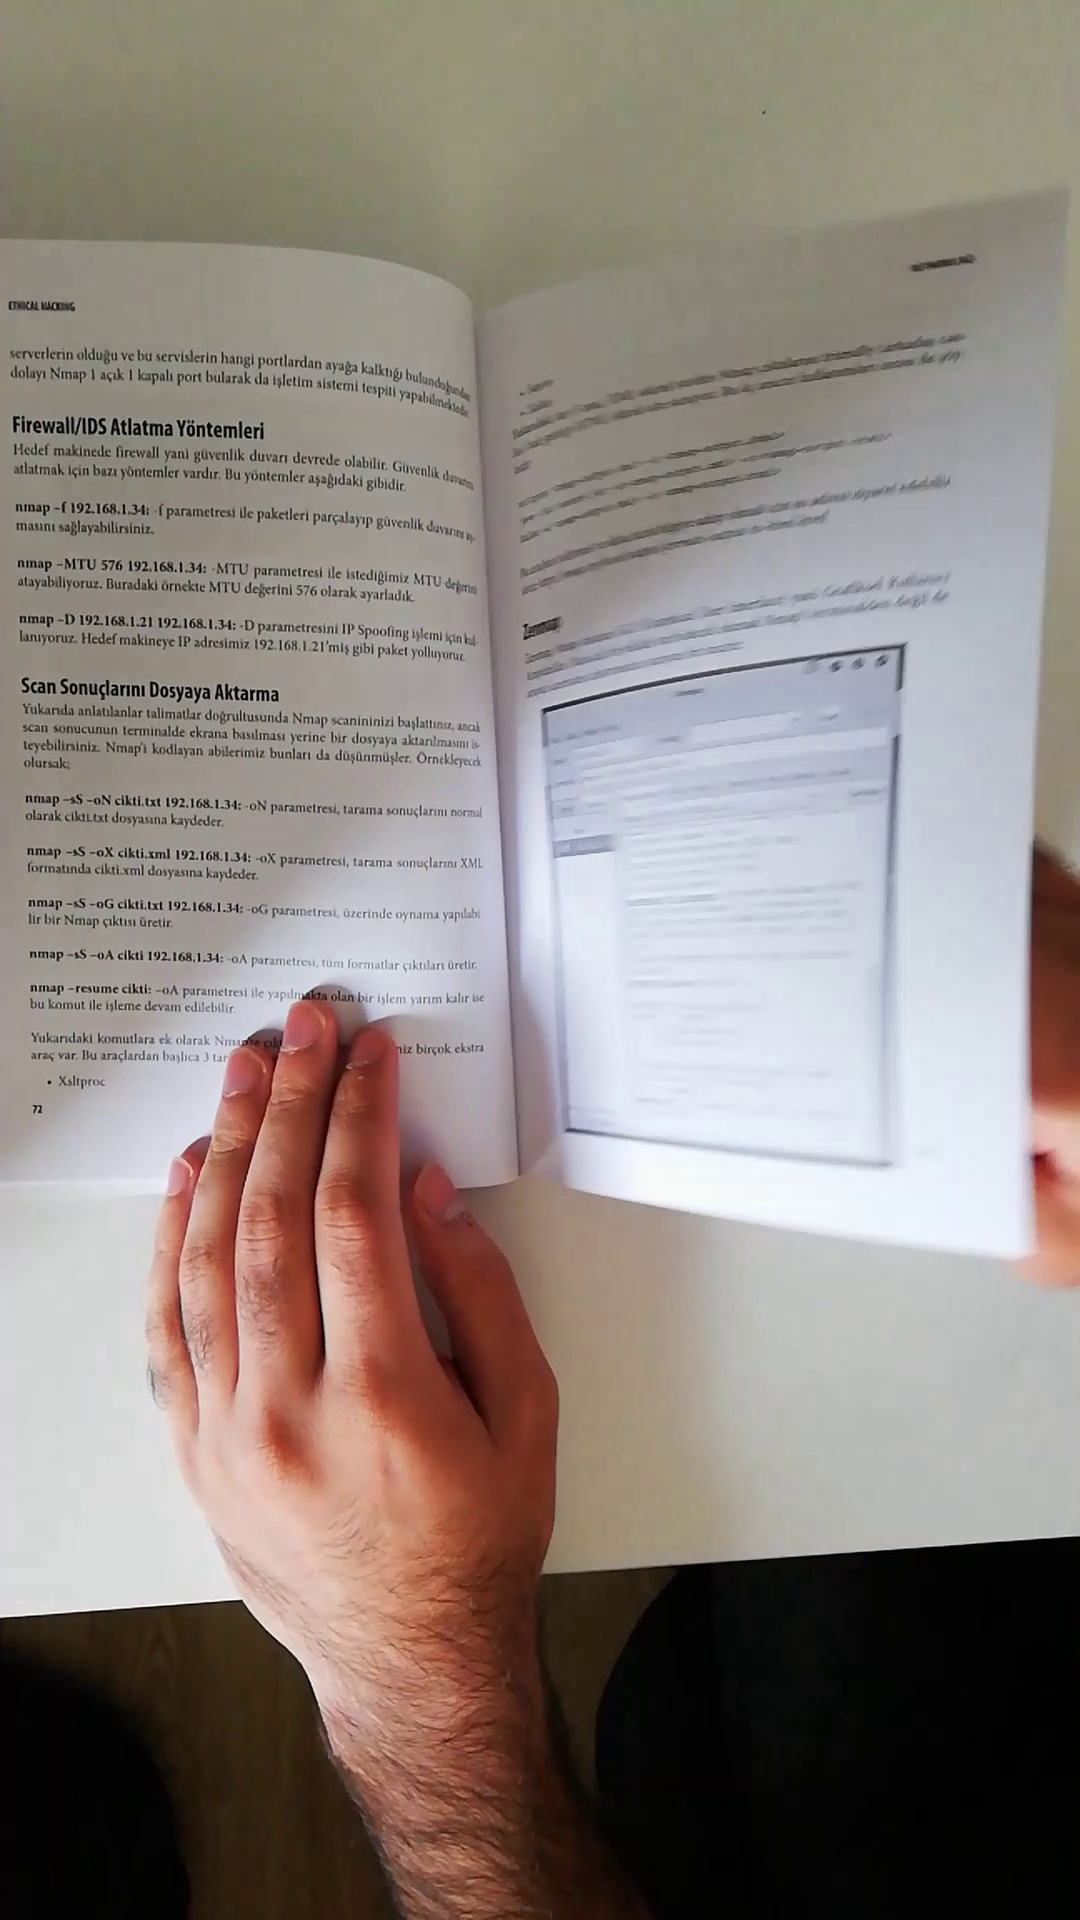

In [ ]:
src="/content/drive/My Drive/Apziva/Colab Notebooks/images/training/flip/"
file="0001_000000010.jpg"
im=Image.open(src+file)
width, height = im.size
print('width is :', width), print('height is :', height)
#len(im.fp.read())
display(im)

The dimension size of images is [1920 x 1080] however it is big and needs to be down sized. it can be decreased by 6 times which would be [320 x 180] 
the batch size is 32 (most common one) 

In [ ]:
#desizing images based on parameters
image_s = [320,180]
batch_size = 32

# Labeling datas to 1. training 2. testing 
train_list_data = image_dataset_from_directory(train_data_dir, label_mode = 'binary', 
                                             image_size = image_s, batch_size = batch_size)

test_list_data = image_dataset_from_directory(test_data_dir, label_mode = 'binary', 
                                             image_size = image_s, batch_size = batch_size)

Found 2392 files belonging to 2 classes.
Found 597 files belonging to 2 classes.


***Model***

For this project I used CNN which is convolutional neural network and the below is showing the architecture of this model 

***EXPLANATION OF THIS MODEL :***

Details of the model:

0. The Input layer.

1. Stage 1: 
    
    2D convolution has 16 filters in a shape of ( 7,7). Stride (2,2) is used
    
    BatchNormalization and ReLU activation applied
   
    MaxPooling uses a filter with a shape of (3,3) and stride (2,2)

2. Stage 2:
    
    2D convolution has 16 filters in a shape of (5,5). Stride (2,2) is used
    
    BatchNormalization and ReLU activation applied
    
    MaxPooling uses a filter with a shape of (2,2) and stride (2,2)    

3. Stage 3: 
    
    2D convolution has 16 filters in a shape of (3,3). Stride (2,2) is used
    
    BatchNormalization and ReLU activation applied
    
    MaxPooling uses a filter with a shape of (2,2) and stride (2,2) 

4. Stage 4:

    Th flattern later to flattern outpuit of stage 3 layer

    Two dense layers reduce input to 32 parameters using ReLU activation

    The output - dense layer reduces to single binary value using sigmoid activation

    All layer's weights in the model are initialized using he_uniform from Tensorflow


INPUT -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE -> DENSE -> DENSE

In [ ]:
#create model
def CNN (input_size = (320, 180, 3)) :

  inputs = Input(input_size)

  #stage 1:
  M = Conv2D(16, (7, 7), strides = (2, 2), kernel_initializer = he_uniform())(inputs)
  M = BatchNormalization(axis = 3)(M)
  # M = ReLU(M)
  M = Activation('relu')(M)
  M = MaxPooling2D((3, 3), strides=(2, 2))(M)

  # stage 2 
  M = Conv2D(64, (5, 5), strides = (2, 2), kernel_initializer = he_uniform())(M)
  M = BatchNormalization(axis = 3)(M)
  # M = ReLU(X)
  M = Activation('relu')(M)
  M = MaxPooling2D((2, 2), strides=(2, 2))(M)

  # Stage 3 
  M = Conv2D(256, (3, 3), strides = (1, 1), kernel_initializer = he_uniform())(M)
  M = BatchNormalization(axis = 3)(M)
  # X = ReLU(X)
  M = Activation('relu')(M)
  M = MaxPooling2D((2, 2), strides=(2, 2))(M)
  # Stage 4
  M = Flatten()(M)
  M = Dense(256, activation='relu', kernel_initializer = he_uniform())(M)
  M = Dense(32, activation='relu', kernel_initializer = he_uniform())(M)
  outputs = Dense(1, activation='sigmoid', kernel_initializer = he_uniform())(M)

  model = Model(inputs = inputs, outputs = outputs)

  return model

Function to create F1 score for Keras

To calculate F1 score, a function created in Keras as F1 score is not included in Keras metrics by default

In [ ]:
def f1_score(y_true, y_pred): 
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tp_fn = K.sum(K.round(K.clip(y_true, 0, 1)))
    tp_fp = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = tp / (tp_fp + K.epsilon())
    recall = tp / (tp_fn + K.epsilon())
    f1 = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1

Now the dimension of model needs to be set and initialized. Adam optimizer is used in this model as well as binary crosstropy for loss function calculation.

For evalution F1 score calculated

In [ ]:
#initialize model 
model = CNN((320, 180, 3))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score])

print(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 320, 180, 3)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 157, 87, 16)       2368      
                                                                 
 batch_normalization_24 (Bat  (None, 157, 87, 16)      64        
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 157, 87, 16)       0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 78, 43, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 37, 20, 64)        2566

This summary indicates that all parameters were created as planned. There are 2.28 M parameters that are trainable in this model. Now the model should be trained for 10 sets of epochs

In [ ]:
history = model.fit(train_list_data, epochs = 10)


Epoch 1/10
75/75 [==============================] - 354s 4s/step - loss: 0.8044 - accuracy: 0.8010 - f1_score: 0.7809
Epoch 2/10
75/75 [==============================] - 85s 1s/step - loss: 0.1148 - accuracy: 0.9590 - f1_score: 0.9577
Epoch 3/10
75/75 [==============================] - 87s 1s/step - loss: 0.0497 - accuracy: 0.9820 - f1_score: 0.9815
Epoch 4/10
75/75 [==============================] - 90s 1s/step - loss: 0.0167 - accuracy: 0.9954 - f1_score: 0.9952
Epoch 5/10
75/75 [==============================] - 88s 1s/step - loss: 0.0103 - accuracy: 0.9979 - f1_score: 0.9976
Epoch 6/10
75/75 [==============================] - 89s 1s/step - loss: 0.0035 - accuracy: 1.0000 - f1_score: 1.0000
Epoch 7/10
75/75 [==============================] - 88s 1s/step - loss: 0.0016 - accuracy: 1.0000 - f1_score: 1.0000
Epoch 8/10
75/75 [==============================] - 89s 1s/step - loss: 0.0011 - accuracy: 1.0000 - f1_score: 1.0000
Epoch 9/10
75/75 [==============================] - 89s 1s/step

***EVALUATION***

In [ ]:
model.evaluate(test_list_data)


19/19 [==============================] - 78s 2s/step - loss: 0.0088 - accuracy: 0.9966 - f1_score: 0.9966


[0.008791819214820862, 0.9966499209403992, 0.996590256690979]

***Results***

By implementing 3 layers CNN the accuracy and F1 scare calculated by test data sets. As above shows, the F1 score is 0.9986 and accuracy with 10 epochs is 0.9983.

These values are high are close hence we can conclude this model was a good model and it was trained with a high accuracy.

